**Preparing the Files**

Here first we extract the available zip file for data available inside of the zip file.

In [42]:
import zipfile
import os

# Define ZIP file path
zip_path = "/content/drive/MyDrive/Classroom/Artificial_Intelligence/Week-5/FruitinAmazon.zip"

# Define a new extraction path with a different name
extract_path = "/content/drive/MyDrive/Classroom/Artificial_Intelligence/Week-5/"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

**Task 1: Data Understanding and Visualization:**

Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

* Get the list of class directories from the train folder.
* Select one image randomly from each class.
* Display the images in a grid format with two rows using matplotlib.

In [43]:
# Necessary Imports
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report

In [44]:
# Define Train and Test Datasets
train_dir = os.path.join(extract_path, "FruitinAmazon/train")
test_dir = os.path.join(extract_path, "FruitinAmazon/test")

In [45]:
class_names = os.listdir(train_dir)
print(f"Classes: {class_names}")

Classes: ['pupunha', 'acai', 'guarana', 'graviola', 'tucuma', 'cupuacu']


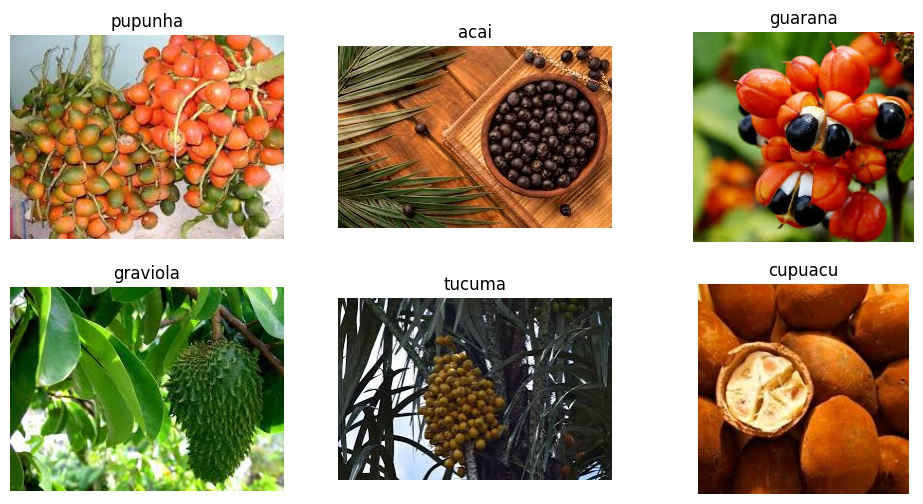

In [46]:
def visualize_images(train_dir, class_names):
    fig, axes = plt.subplots(2, len(class_names) // 2, figsize=(12, 6))
    axes = axes.flatten()
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(train_dir, class_name)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")
    plt.show()

visualize_images(train_dir, class_names)

Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”
* Hint:
- Iterate through each class subdirectory and check if each image is valid.
- Use the Image.open() function to attempt to load each image.
- If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from
the directory and print f"Removed corrupted image: {image_path}".
- Maintain a list of all corrupted image paths for reporting.
* Expected Output: No corrupted images found.

In [47]:
damagedImages = []
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = load_img(img_path)  # Try opening the image
        except (IOError, SyntaxError):
            damagedImages.append(img_path)
            os.remove(img_path)
            print(f"Damaged image removed: {img_path}")

if not damagedImages:
    print("No Damaged Images Found.")

No Damaged Images Found.


Task 2: Loading and Preprocessing Image Data in keras:
In this section, we will load and preprocess image data from a directory using the
image dataset from directory function in Keras.

This function is used to load images from a directory structure where subdirectories represent different
classes. We will also apply basic preprocessing, including resizing and batching and normalization of
images. The same function can be used to load train and validation data.

In [48]:
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:
Convolutional Architecture:

• Convolutional Layer 1:
– Filter Size (F): (3, 3)
– Number of Filters (k): 32
– Padding (P): same
– Stride (s): 1
• Activation Layer: ReLU activation
• Pooling Layer 1: Max pooling
– Filter Size (F): (2, 2)
– Stride (s): 2
• Convolutional Layer 2:
– Filter Size (F): (3, 3)
– Number of Filters (k): 32
– Padding (P): same
– Stride (s): 1
• Activation Layer: ReLU activation
• Pooling Layer 2: Max pooling
– Filter Size (F): (2, 2)
– Stride (s): 2
Fully Connected Network Architecture:
• Flatten Layer: Flatten the input coming from the convolutional layers
• Input Layer:
• Hidden Layer - 2:
– Number of Neurons: 64
– Number of Neurons: 128
• Output Layer:
– Number of Neurons: num classes (number of output classes)

In [49]:
rescale = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

In [50]:
num_classes = len(class_names)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Task 4: Compile the Model
Model Compilation
* Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).
Task 4: Train the Model
Model Training
* Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
* Use val ds for validation.

* Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max"),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.1846 - loss: 1.7798

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 647ms/step - accuracy: 0.1871 - loss: 1.7787 - val_accuracy: 0.7222 - val_loss: 1.4086
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.3808 - loss: 1.4719

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 801ms/step - accuracy: 0.3759 - loss: 1.4809 - val_accuracy: 0.8333 - val_loss: 0.9664
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 678ms/step - accuracy: 0.4470 - loss: 1.3368 - val_accuracy: 0.1667 - val_loss: 1.6504
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 453ms/step - accuracy: 0.5582 - loss: 1.1303 - val_accuracy: 0.3889 - val_loss: 1.3073
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 525ms/step - accuracy: 0.7951 - loss: 0.7954 - val_accuracy: 0.8333 - val_loss: 0.7481
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.7470 - loss: 0.7481 - val_accuracy: 0.8333 - val_loss: 0.6666
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - accuracy: 0.9006 - loss: 0.5138 - val_accuracy: 0.4444 - val_loss: 1.2515
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 740ms/step - accuracy: 0.8663 - loss: 0.5403 - val_accuracy: 0.7222 - val_loss: 0.8139
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.9699 - loss: 0.2779

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.9705 - loss: 0.2801 - val_accuracy: 0.8889 - val_loss: 0.3322
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 0.9891 - loss: 0.1662 - val_accuracy: 0.8889 - val_loss: 0.5185
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 1.0000 - loss: 0.1003 - val_accuracy: 0.8333 - val_loss: 0.5232
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 1.0000 - loss: 0.0569 - val_accuracy: 0.8889 - val_loss: 0.3225
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 535ms/step - accuracy: 0.9674 - loss: 0.0558 - val_accuracy: 0.8333 - val_loss: 0.4349
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 729ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.8333 - val_loss: 0.5461
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 1.0000 - loss: 0.0407 - val_accuracy: 0.8889 - val_loss: 0.2631
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 1.0000 - loss: 0.0085

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.9444 - val_loss: 0.2117
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.9891 - loss: 0.0320 - val_accuracy: 0.8889 - val_loss: 0.2784
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 0.8889 - val_loss: 0.4710
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 704ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.8333 - val_loss: 0.6934
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 761ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 0.8333 - val_loss: 0.6212
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 503ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.8889 - val_loss: 0.4008
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 492ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.8889 - val_loss: 0.2504
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9444 - val_lo

Task 5: Evaluate the Model
Model Evaluation
* After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [53]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_ds = test_ds.map(lambda x, y: (rescale(x), y))
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.7000 - loss: 0.5763
Test Accuracy: 70.00%


Task 6: Save and Load the Model
Model Saving and Loading
* Save the trained model to an .h5 file using model.save().
* Load the saved model and re-evaluate its performance on the test set.

In [54]:
model.save("final_model.h5")
loaded_model = tf.keras.models.load_model("final_model.h5")

Task 7: Predictions and Classification Report
Making Predictions
* Use model.predict() to make predictions on test images.
* Convert the model’s predicted probabilities to digit labels using np.argmax().
* Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [55]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = loaded_model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
              precision    recall  f1-score   support

     pupunha       0.75      0.60      0.67         5
        acai       0.44      0.80      0.57         5
     guarana       0.80      0.80      0.80         5
    graviola       1.00      0.60      0.75         5
      tucuma       0.83      1.00      0.91         5
     cupuacu       0.67      0.40      0.50         5

    accuracy                           0.70        30
   macro avg       0.75      0.70      0.70        30
weighted avg       0.75      0.70      0.70        30



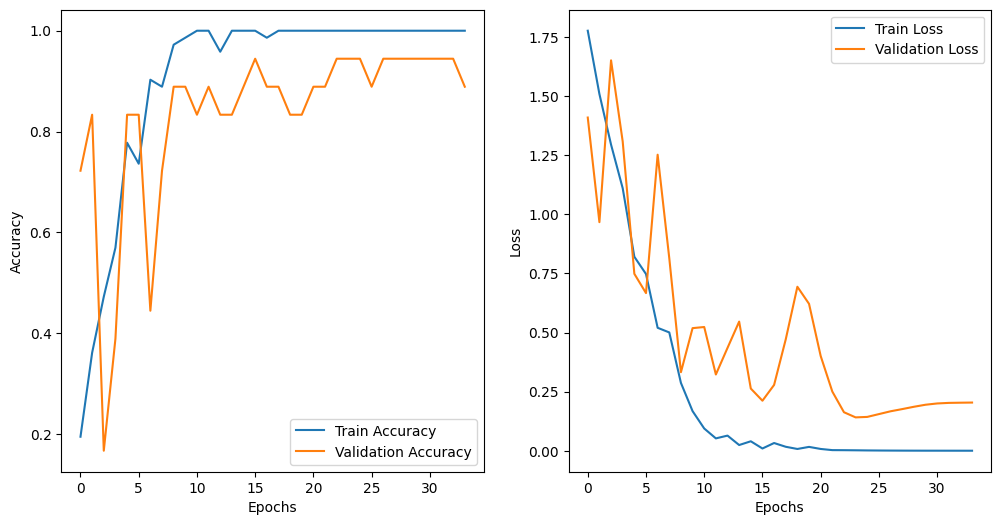

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()